In [1]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import os

In [176]:
directory_in_str = "E:\\Haritha\\MasterThesis\\ModelTraining\\aa_measurements\\March\\16.05.2023"
Emptyfilelist = []
empty = pd.DataFrame()
print("Adding the following files : ")
for file in os.listdir(directory_in_str) :
    if file.startswith("adc_empty") :
        print(file)
        filepathempty = directory_in_str +"\\" + file
        df1 = pd.read_csv(filepathempty, sep = '\t', header = None , engine = 'python')
        empty  = empty.append(df1)
    else :
        continue 
        
        
empty["Label"] = 0
empty.head()

Adding the following files : 
adc_empty1_morelieddown_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_10060\1989810029.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


adc_empty2_morelieddown_.txt


MemoryError: Unable to allocate 12.5 MiB for an array with shape (16397, 100) and data type int64

<AxesSubplot: >

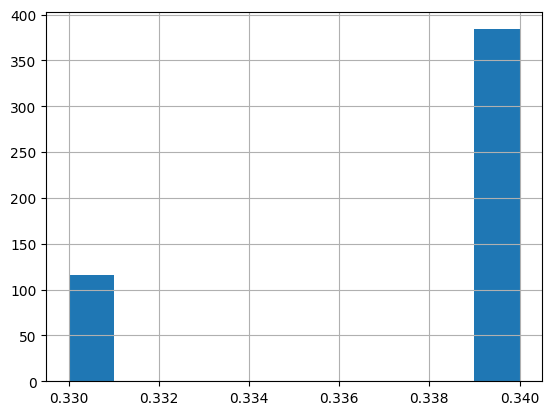

In [131]:
#Plotting the distance column to remove any anomalies (where distance = 0.92 m or so)

empty.iloc[:,10].hist()

In [132]:
# Empty seat Data ingest and attach Label = 0
empty.reset_index(inplace = True)

#Dropping anomalies
empty.drop(empty[empty.iloc[:,10]>=0.41].index,inplace = True)

#Index given is 16, as iloc uses n-1 as the end limit for 0:16 
empty.drop(empty.iloc[:,0:17] ,axis=1,inplace=True)
#empty = empty.T
empty.head()

,16,17,18,19,20,21,22,23,24,25,...,16391,16392,16393,16394,16395,16396,16397,16398,16399,Label
0,-195,-191,-186,756,744,723,678,605,511,398,...,-203,-207,-216,-220,-226,-226,-227,-223,-219,0
1,-217,-209,-204,713,740,747,739,712,657,575,...,-194,-200,-202,-207,-213,-212,-210,-212,-214,0
2,-210,-205,-200,-191,717,748,762,752,728,677,...,-168,-172,-173,-181,-190,-198,-206,-210,-218,0
3,-222,-229,-543,-392,-240,-86,64,211,351,473,...,-91,-94,-99,-106,-118,-126,-132,-143,-152,0
4,-156,-162,-166,-1210,-1167,-1095,-998,-873,-730,-574,...,-144,-155,-158,-170,-182,-191,-199,-206,-207,0


In [133]:
empty.shape

(500, 16385)

In [134]:
# Reading all baby seat readings into one dataframe
baby = pd.DataFrame()
print("Adding the following files : ")
for file in os.listdir(directory_in_str) :
    if file.startswith("adc_baby") :
        print(file)
        filepathbaby = directory_in_str +"\\" + file
        df2 = pd.read_csv(filepathbaby, sep = '\t', header = None , engine = 'python')
        baby  = baby.append(df2)
    else :
        continue
               
baby["Label"] = 1
baby.head()

Adding the following files : 
adc_baby_hdown_fdown_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_10060\209411304.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby_hdown_lfup_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_10060\209411304.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby_hdown_rfup_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_10060\209411304.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby_lhup_fdown_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_10060\209411304.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


adc_baby_rhup_fdown_.txt


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_10060\209411304.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baby  = baby.append(df2)


,0,1,2,3,4,5,6,7,8,9,...,16391,16392,16393,16394,16395,16396,16397,16398,16399,Label
0,64,32768,1,1,512,0,1953125,12,0.0,0,...,-176,-176,-174,-171,-171,-168,-167,-160,-158,1
1,64,32768,1,1,512,0,1953125,12,0.0,0,...,-129,-126,-125,-121,-122,-126,-131,-134,-135,1
2,64,32768,1,1,512,0,1953125,12,0.0,0,...,-144,-148,-148,-152,-153,-158,-159,-165,-172,1
3,64,32768,1,1,512,0,1953125,12,0.0,0,...,-186,-186,-186,-183,-182,-180,-178,-180,-175,1
4,64,32768,1,1,512,0,1953125,12,0.0,0,...,-178,-180,-175,-175,-170,-162,-157,-156,-151,1


<AxesSubplot: >

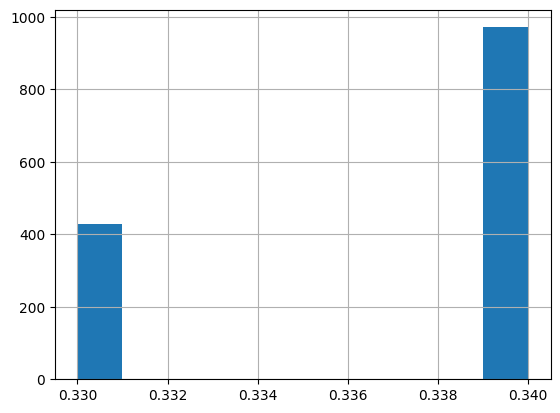

In [135]:
#Plotting the distance column to verify presence of any anomalies (where distance = 0.92 m or so)

baby.iloc[:,10].hist()

In [136]:
#Dropping anomalies
baby.drop(baby[baby.iloc[:,10]>=0.41].index,inplace = True)

In [137]:
#Index given is 16, as iloc uses n-1 as the end limit for 0:16 
baby.reset_index(inplace = True)

baby.drop(baby.iloc[:,0:17] ,axis=1,inplace=True)
baby.head()

,16,17,18,19,20,21,22,23,24,25,...,16391,16392,16393,16394,16395,16396,16397,16398,16399,Label
0,-172,-175,-172,-173,-178,-176,-179,-184,-4,-116,...,-176,-176,-174,-171,-171,-168,-167,-160,-158,1
1,-157,-151,-826,-788,-732,-662,-578,-484,-388,-291,...,-129,-126,-125,-121,-122,-126,-131,-134,-135,1
2,-134,-135,-297,-145,10,164,307,441,553,646,...,-144,-148,-148,-152,-153,-158,-159,-165,-172,1
3,-175,-171,775,761,728,670,586,484,371,249,...,-186,-186,-186,-183,-182,-180,-178,-180,-175,1
4,-173,-169,-165,-163,-806,-835,-846,-846,-836,-803,...,-178,-180,-175,-175,-170,-162,-157,-156,-151,1


In [138]:
baby.shape

(1400, 16385)

In [139]:
total = pd.concat([empty,baby])
total

,16,17,18,19,20,21,22,23,24,25,...,16391,16392,16393,16394,16395,16396,16397,16398,16399,Label
0,-195,-191,-186,756,744,723,678,605,511,398,...,-203,-207,-216,-220,-226,-226,-227,-223,-219,0
1,-217,-209,-204,713,740,747,739,712,657,575,...,-194,-200,-202,-207,-213,-212,-210,-212,-214,0
2,-210,-205,-200,-191,717,748,762,752,728,677,...,-168,-172,-173,-181,-190,-198,-206,-210,-218,0
3,-222,-229,-543,-392,-240,-86,64,211,351,473,...,-91,-94,-99,-106,-118,-126,-132,-143,-152,0
4,-156,-162,-166,-1210,-1167,-1095,-998,-873,-730,-574,...,-144,-155,-158,-170,-182,-191,-199,-206,-207,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,-144,-152,-158,-170,-769,-717,-641,-553,-460,-367,...,-203,-203,-199,-193,-186,-179,-174,-169,-160,1
1396,-153,-148,-142,-133,702,726,733,723,690,633,...,-95,-102,-109,-115,-121,-122,-130,-139,-141,1
1397,-147,-156,-827,-812,-778,-728,-658,-570,-479,-386,...,-117,-123,-126,-132,-143,-153,-161,-168,-177,1
1398,-185,-192,-199,-204,-478,-381,-290,-197,-110,-22,...,-109,-106,-104,-109,-114,-119,-125,-125,-128,1


In [86]:
#Getting a copy of dataframe with only raw values and without any calculated columns or values

onlyval = pd.DataFrame()
onlyval = pd.concat([onlyval,total])
onlyval.drop("Label", axis=1, inplace=True)
onlyval

,16,17,18,19,20,21,22,23,24,25,...,16390,16391,16392,16393,16394,16395,16396,16397,16398,16399
0,-155,-158,-159,-159,-330,-274,-219,-158,-96,-32,...,-141,-139,-144,-147,-151,-149,-148,-151,-153,-154
1,-163,-165,-162,-161,190,226,249,264,269,264,...,-158,-159,-158,-157,-162,-164,-168,-170,-167,-165
2,-152,-152,-158,-157,-158,-161,-158,-411,-361,-308,...,-132,-134,-137,-137,-140,-140,-143,-145,-145,-149
3,-163,-164,-166,-312,-251,-200,-141,-83,-14,58,...,-144,-144,-145,-146,-148,-148,-153,-159,-160,-163
4,-168,-170,-170,-161,-97,-30,38,103,159,204,...,-151,-155,-153,-156,-158,-156,-156,-158,-159,-162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,-184,-184,-184,-187,-390,-346,-298,-249,-207,-150,...,-154,-154,-156,-165,-170,-183,-184,-185,-188,-190
1172,-189,-193,-192,-304,-252,-203,-147,-95,-34,27,...,-154,-161,-167,-170,-175,-181,-187,-195,-200,-199
1173,-205,-210,-208,-458,-448,-426,-391,-345,-293,-247,...,-164,-169,-173,-180,-178,-182,-186,-185,-183,-190
1174,-193,-193,-265,-211,-155,-99,-41,20,76,125,...,-111,-110,-114,-116,-123,-126,-127,-128,-130,-133


# Scaling values to be used in ML models

In [143]:
#Shifting amplitudes by 150 (158.5)
total.iloc[:,0:16384] = total.iloc[:,0:16384] + 158
total

,16,17,18,19,20,21,22,23,24,25,...,16392,16393,16394,16395,16396,16397,16398,16399,Label,Max
0,-37,-33,-28,914,902,881,836,763,669,556,...,-49,-58,-62,-68,-68,-69,-65,-61,0,974
1,-59,-51,-46,871,898,905,897,870,815,733,...,-42,-44,-49,-55,-54,-52,-54,-56,0,996
2,-52,-47,-42,-33,875,906,920,910,886,835,...,-14,-15,-23,-32,-40,-48,-52,-60,0,989
3,-64,-71,-385,-234,-82,72,222,369,509,631,...,64,59,52,40,32,26,15,6,0,978
4,2,-4,-8,-1052,-1009,-937,-840,-715,-572,-416,...,3,0,-12,-24,-33,-41,-48,-49,0,995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,14,6,0,-12,-611,-559,-483,-395,-302,-209,...,-45,-41,-35,-28,-21,-16,-11,-2,1,950
1396,5,10,16,25,860,884,891,881,848,791,...,56,49,43,37,36,28,19,17,1,937
1397,11,2,-669,-654,-620,-570,-500,-412,-321,-228,...,35,32,26,15,5,-3,-10,-19,1,921
1398,-27,-34,-41,-46,-320,-223,-132,-39,48,136,...,52,54,49,44,39,33,33,30,1,921


In [144]:
total["Max"]=total.iloc[:,0:16384].max(axis=1)
total.head()

,16,17,18,19,20,21,22,23,24,25,...,16392,16393,16394,16395,16396,16397,16398,16399,Label,Max
0,-37,-33,-28,914,902,881,836,763,669,556,...,-49,-58,-62,-68,-68,-69,-65,-61,0,1132
1,-59,-51,-46,871,898,905,897,870,815,733,...,-42,-44,-49,-55,-54,-52,-54,-56,0,1154
2,-52,-47,-42,-33,875,906,920,910,886,835,...,-14,-15,-23,-32,-40,-48,-52,-60,0,1147
3,-64,-71,-385,-234,-82,72,222,369,509,631,...,64,59,52,40,32,26,15,6,0,1136
4,2,-4,-8,-1052,-1009,-937,-840,-715,-572,-416,...,3,0,-12,-24,-33,-41,-48,-49,0,1153


In [145]:
total["Max"].max(axis=0)

1187

In [146]:
tempmin = total.iloc[:,0:16384].min(axis=1)
tempmin.min()

-1246

In [147]:
total2 = pd.DataFrame()
total2 = pd.concat([total2,total])
total2

,16,17,18,19,20,21,22,23,24,25,...,16392,16393,16394,16395,16396,16397,16398,16399,Label,Max
0,-37,-33,-28,914,902,881,836,763,669,556,...,-49,-58,-62,-68,-68,-69,-65,-61,0,1132
1,-59,-51,-46,871,898,905,897,870,815,733,...,-42,-44,-49,-55,-54,-52,-54,-56,0,1154
2,-52,-47,-42,-33,875,906,920,910,886,835,...,-14,-15,-23,-32,-40,-48,-52,-60,0,1147
3,-64,-71,-385,-234,-82,72,222,369,509,631,...,64,59,52,40,32,26,15,6,0,1136
4,2,-4,-8,-1052,-1009,-937,-840,-715,-572,-416,...,3,0,-12,-24,-33,-41,-48,-49,0,1153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,14,6,0,-12,-611,-559,-483,-395,-302,-209,...,-45,-41,-35,-28,-21,-16,-11,-2,1,1108
1396,5,10,16,25,860,884,891,881,848,791,...,56,49,43,37,36,28,19,17,1,1095
1397,11,2,-669,-654,-620,-570,-500,-412,-321,-228,...,35,32,26,15,5,-3,-10,-19,1,1079
1398,-27,-34,-41,-46,-320,-223,-132,-39,48,136,...,52,54,49,44,39,33,33,30,1,1079


## Scaling values from -1 to +1 by dividing by maximum

In [148]:
total2.reset_index(drop=True, inplace=True)
total2

,16,17,18,19,20,21,22,23,24,25,...,16392,16393,16394,16395,16396,16397,16398,16399,Label,Max
0,-37,-33,-28,914,902,881,836,763,669,556,...,-49,-58,-62,-68,-68,-69,-65,-61,0,1132
1,-59,-51,-46,871,898,905,897,870,815,733,...,-42,-44,-49,-55,-54,-52,-54,-56,0,1154
2,-52,-47,-42,-33,875,906,920,910,886,835,...,-14,-15,-23,-32,-40,-48,-52,-60,0,1147
3,-64,-71,-385,-234,-82,72,222,369,509,631,...,64,59,52,40,32,26,15,6,0,1136
4,2,-4,-8,-1052,-1009,-937,-840,-715,-572,-416,...,3,0,-12,-24,-33,-41,-48,-49,0,1153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,14,6,0,-12,-611,-559,-483,-395,-302,-209,...,-45,-41,-35,-28,-21,-16,-11,-2,1,1108
1896,5,10,16,25,860,884,891,881,848,791,...,56,49,43,37,36,28,19,17,1,1095
1897,11,2,-669,-654,-620,-570,-500,-412,-321,-228,...,35,32,26,15,5,-3,-10,-19,1,1079
1898,-27,-34,-41,-46,-320,-223,-132,-39,48,136,...,52,54,49,44,39,33,33,30,1,1079


In [115]:
total2.Max

0        878.5
1        869.5
2        889.5
3        887.5
4        874.5
         ...  
2371    1287.5
2372    1294.5
2373    1292.5
2374    1283.5
2375    1291.5
Name: Max, Length: 2376, dtype: float64

In [116]:
total2.iloc[:,0:16384] = total2.iloc[:,0:16384].div(total2.Max, axis=0)
total2

,16,17,18,19,20,21,22,23,24,25,...,16392,16393,16394,16395,16396,16397,16398,16399,Label,Max
0,0.003984,0.000569,-0.000569,-0.000569,-0.195219,-0.131474,-0.068867,0.000569,0.071144,0.143995,...,0.016505,0.013090,0.008537,0.010814,0.011952,0.008537,0.006261,0.005122,0,878.5
1,-0.005175,-0.007476,-0.004025,-0.002875,0.400805,0.442208,0.468660,0.485911,0.491662,0.485911,...,0.000575,0.001725,-0.004025,-0.006325,-0.010926,-0.013226,-0.009776,-0.007476,0,869.5
2,0.007307,0.007307,0.000562,0.001686,0.000562,-0.002811,0.000562,-0.283867,-0.227656,-0.168072,...,0.024171,0.024171,0.020798,0.020798,0.017426,0.015177,0.015177,0.010680,0,889.5
3,-0.005070,-0.006197,-0.008451,-0.172958,-0.104225,-0.046761,0.019718,0.085070,0.162817,0.243944,...,0.015211,0.014085,0.011831,0.011831,0.006197,-0.000563,-0.001690,-0.005070,0,887.5
4,-0.010863,-0.013150,-0.013150,-0.002859,0.070326,0.146941,0.224700,0.299028,0.363065,0.414523,...,0.006289,0.002859,0.000572,0.002859,0.002859,0.000572,-0.000572,-0.004002,0,874.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,-0.019806,-0.019806,-0.019806,-0.022136,-0.179806,-0.145631,-0.108350,-0.070291,-0.037670,0.006602,...,0.001942,-0.005049,-0.008932,-0.019029,-0.019806,-0.020583,-0.022913,-0.024466,1,1287.5
2372,-0.023561,-0.026651,-0.025879,-0.112399,-0.072229,-0.034376,0.008884,0.049054,0.096176,0.143299,...,-0.006566,-0.008884,-0.012746,-0.017381,-0.022016,-0.028196,-0.032059,-0.031286,1,1294.5
2373,-0.035977,-0.039845,-0.038298,-0.231721,-0.223985,-0.206963,-0.179884,-0.144294,-0.104062,-0.068472,...,-0.011219,-0.016634,-0.015087,-0.018182,-0.021277,-0.020503,-0.018956,-0.024371,1,1292.5
2374,-0.026880,-0.026880,-0.082976,-0.040904,0.002727,0.046358,0.091547,0.139073,0.182704,0.220880,...,0.034671,0.033113,0.027659,0.025321,0.024542,0.023763,0.022205,0.019868,1,1283.5


#### Finding the median/average of each column and plotting an average signal

In [21]:
empty.iloc[:,0:16384]

,16,17,18,19,20,21,22,23,24,25,...,16390,16391,16392,16393,16394,16395,16396,16397,16398,16399
0,-155,-158,-159,-159,-330,-274,-219,-158,-96,-32,...,-141,-139,-144,-147,-151,-149,-148,-151,-153,-154
1,-163,-165,-162,-161,190,226,249,264,269,264,...,-158,-159,-158,-157,-162,-164,-168,-170,-167,-165
2,-152,-152,-158,-157,-158,-161,-158,-411,-361,-308,...,-132,-134,-137,-137,-140,-140,-143,-145,-145,-149
3,-163,-164,-166,-312,-251,-200,-141,-83,-14,58,...,-144,-144,-145,-146,-148,-148,-153,-159,-160,-163
4,-168,-170,-170,-161,-97,-30,38,103,159,204,...,-151,-155,-153,-156,-158,-156,-156,-158,-159,-162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-106,-103,-104,-103,133,170,193,205,201,179,...,-174,-168,-163,-162,-156,-151,-153,-150,-146,-141
1196,-135,-130,-127,-108,-41,13,67,113,155,195,...,-135,-128,-126,-127,-124,-120,-117,-118,-119,-124
1197,-128,-127,-128,-126,151,110,68,21,-28,-88,...,-167,-164,-163,-160,-151,-149,-147,-144,-142,-140
1198,-138,-131,-126,-5,47,98,142,175,205,220,...,-148,-147,-147,-142,-135,-131,-127,-124,-123,-127


In [101]:
averagesignal = total.iloc[:,0:16384].median(axis=0)
averagesignal

16       0.5
17      -0.5
18      -0.5
19      -2.5
20      -4.5
        ... 
16395    5.5
16396    5.5
16397    4.5
16398    3.5
16399    2.5
Length: 16384, dtype: float64

In [41]:
averagesignalbaby = baby.iloc[:,0:16384].mode(axis=0)
averagesignalbaby

,16,17,18,19,20,21,22,23,24,25,...,16390,16391,16392,16393,16394,16395,16396,16397,16398,16399
0,-167.0,-169.0,-170.0,-169.0,172.0,127.0,-449.0,-446.0,178.0,179.0,...,-150.0,-148.0,-149.0,-144.0,-152.0,-166.0,-149.0,-148.0,-153.0,-152.0
1,NaN,NaN,NaN,NaN,NaN,NaN,-436.0,188.0,186.0,183.0,...,NaN,NaN,NaN,NaN,NaN,-149.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


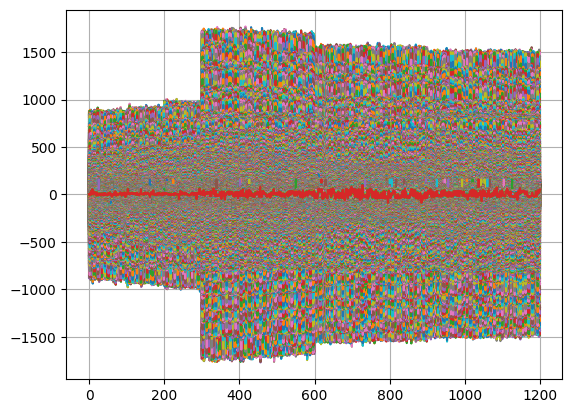

In [102]:
# Plotting the average signal - empty
ax11 = averagesignal.iloc[0,:].plot(legend=None)
ax11.grid(True)

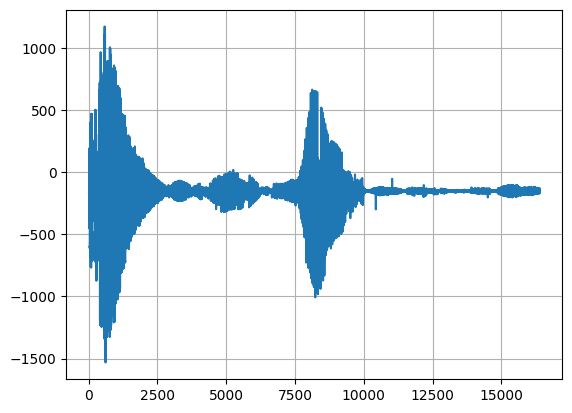

In [42]:
# Plotting the average signal - baby
ax12 = averagesignalbaby.iloc[0,:].plot(legend=None)
ax12.grid(True)

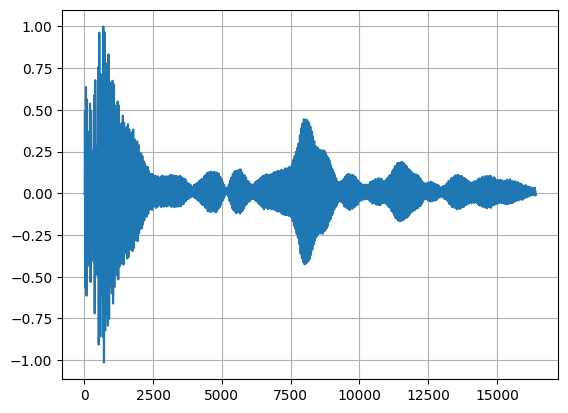

In [118]:
plotemptytest = total2.iloc[1,0:16384].T
ax = plotemptytest.plot(legend=None)
ax.grid(True)

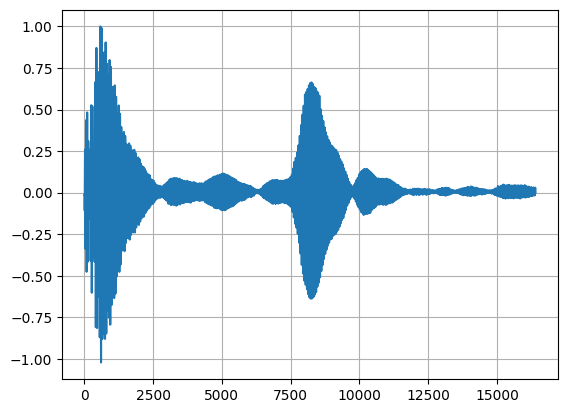

In [119]:
plotbabytest = total2.iloc[2000,0:16384].T
ax = plotbabytest.plot(legend=None)
ax.grid(True)

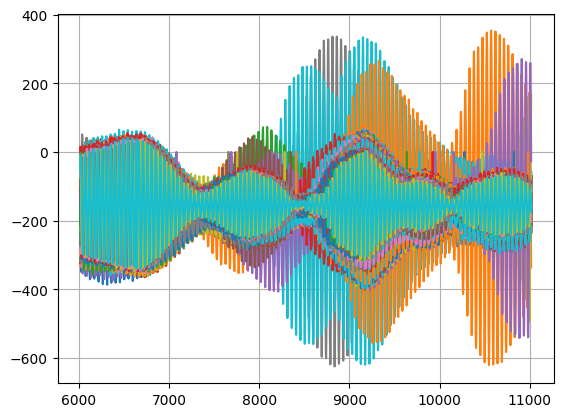

In [7]:
babyfinal2 = baby.iloc[:,6000:11000]
plotbaby2 = babyfinal2.T
ax2 = plotbaby2.plot(legend=None)
ax2.grid(True)

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(total.corr(),cmap='viridis',annot=False)

In [72]:
# Scaling values from -1 to +1 possibly, by dividing each row with its maximum value
total["Max"]= total.iloc[:,0:16384].max(axis=1)
total

,16,17,18,19,20,21,22,23,24,25,...,16393,16394,16395,16396,16397,16398,16399,Label,Variance,Max
0,-155,-158,-159,-159,-330,-274,-219,-158,-96,-32,...,-147,-151,-149,-148,-151,-153,-154,0,20201.636243,720
1,-163,-165,-162,-161,190,226,249,264,269,264,...,-157,-162,-164,-168,-170,-167,-165,0,19695.036824,711
2,-152,-152,-158,-157,-158,-161,-158,-411,-361,-308,...,-137,-140,-140,-143,-145,-145,-149,0,20131.885473,731
3,-163,-164,-166,-312,-251,-200,-141,-83,-14,58,...,-146,-148,-148,-153,-159,-160,-163,0,20438.382201,729
4,-168,-170,-170,-161,-97,-30,38,103,159,204,...,-156,-158,-156,-156,-158,-159,-162,0,19754.186391,716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-184,-184,-184,-187,-390,-346,-298,-249,-207,-150,...,-165,-170,-183,-184,-185,-188,-190,1,48283.523141,1129
1196,-189,-193,-192,-304,-252,-203,-147,-95,-34,27,...,-170,-175,-181,-187,-195,-200,-199,1,49396.106430,1136
1197,-205,-210,-208,-458,-448,-426,-391,-345,-293,-247,...,-180,-178,-182,-186,-185,-183,-190,1,47959.107609,1134
1198,-193,-193,-265,-211,-155,-99,-41,20,76,125,...,-116,-123,-126,-127,-128,-130,-133,1,48215.081796,1125


# Conversion ADC to FFT

In [153]:
emptynp = total2.iloc[0:500,0:16384].to_numpy()
babynp = total2.iloc[500:1900,0:16384].to_numpy()

In [154]:
babynp

array([[ -14,  -17,  -14, ...,   -9,   -2,    0],
       [   1,    7, -668, ...,   27,   24,   23],
       [  24,   23, -139, ...,   -1,   -7,  -14],
       ...,
       [  11,    2, -669, ...,   -3,  -10,  -19],
       [ -27,  -34,  -41, ...,   33,   33,   30],
       [  27,   14,    3, ...,   27,   15,    5]], dtype=int64)

In [157]:
#X_fft = np.fft.fft(empty)
#X_fft = np.abs(X_fft)
from numpy.fft import fft, ifft

emptyT = total2.iloc[0:500,0:16384].T

X_ffte = emptyT.apply(np.fft.fft)
N = 16384
X_fftmage = np.abs(X_ffte)/N

babyT = total2.iloc[500:1900,0:16384].T

X_fftb = babyT.apply(np.fft.fft)
N=16384
X_fftmagb = np.abs(X_fftb)/N

In [158]:
X_fftmage

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
16,3.273071,3.751221,2.522522,5.001343,5.285583,5.513489,3.302185,2.538757,3.018494,3.869263,...,5.190125,5.747009,4.400940,3.828857,3.949829,10.227417,3.949646,3.223816,3.837646,1.586060
17,0.666359,0.964731,3.509451,0.664347,0.672136,0.540577,0.307902,0.492592,0.473511,1.079702,...,1.388595,1.501948,0.717175,0.161183,0.349334,4.274516,0.477107,0.172398,0.446689,6.726630
18,0.363607,0.559410,4.562703,0.684972,0.469529,0.263991,0.743321,0.421945,0.752463,0.650261,...,0.687972,0.523122,0.358765,0.123258,0.367082,1.803441,0.625938,0.406369,0.556292,7.971700
19,0.255752,0.254826,5.108289,0.297424,0.085077,0.453355,0.361764,0.745076,0.667078,0.377244,...,0.468761,0.535321,0.844919,0.252684,0.352148,1.124785,0.406882,0.460245,0.012022,4.403422
20,0.311711,0.436016,3.713796,0.613576,0.186741,0.188135,0.632975,0.571259,0.510591,0.624931,...,0.302060,0.985757,0.318166,0.199718,0.425743,0.910329,0.488328,0.452190,0.545796,3.382903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16395,0.252150,0.193252,2.223115,0.382870,0.209959,0.303218,0.442621,0.144687,0.598958,0.828185,...,0.492005,0.581967,0.320554,0.104798,0.292392,0.357382,0.351413,0.178431,0.361962,2.127708
16396,0.311711,0.436016,3.713796,0.613576,0.186741,0.188135,0.632975,0.571259,0.510591,0.624931,...,0.302060,0.985757,0.318166,0.199718,0.425743,0.910329,0.488328,0.452190,0.545796,3.382903
16397,0.255752,0.254826,5.108289,0.297424,0.085077,0.453355,0.361764,0.745076,0.667078,0.377244,...,0.468761,0.535321,0.844919,0.252684,0.352148,1.124785,0.406882,0.460245,0.012022,4.403422
16398,0.363607,0.559410,4.562703,0.684972,0.469529,0.263991,0.743321,0.421945,0.752463,0.650261,...,0.687972,0.523122,0.358765,0.123258,0.367082,1.803441,0.625938,0.406369,0.556292,7.971700


In [166]:
temp = X_fftmage.iloc[:,:]
temp
ax2 = temp.plot(legend=None)
ax2.grid(True)
#ax2.set_xlim(200,500)
ax2.set_ylim(0,70)

MemoryError: Unable to allocate 62.5 MiB for an array with shape (500, 16384) and data type float64

In [165]:
tempb = X_fftmagb.iloc[:,:]
tempb
ax3 = tempb.plot(legend=None)
ax3.grid(True)
ax3.set_xlim(200,500)
#ax3.set_ylim(0,70)

MemoryError: Unable to allocate 175. MiB for an array with shape (1400, 16384) and data type float64

In [167]:
tempb

,500,501,502,503,504,505,506,507,508,509,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
16,3.845886,5.131226,5.648926,4.824951,5.798645,4.209106,3.986816,3.549683,5.720886,1.448303,...,4.911255,4.017517,3.579590,3.898499,1.573181,3.453674,3.422729,3.984253,2.194641,6.892090
17,6.403231,0.970122,0.964546,0.904527,9.102532,0.428352,0.226856,0.432948,1.667368,4.887866,...,1.311289,0.581069,0.465319,0.682591,5.890660,0.490698,0.340922,0.372219,5.904371,3.323169
18,6.214015,0.296085,0.106058,0.082806,5.131463,0.388298,0.193323,0.242148,1.548146,6.135121,...,1.391854,0.281266,0.391702,0.618814,4.238770,0.047987,0.292942,0.186113,4.869229,1.207031
19,4.982028,0.304206,0.184677,0.064944,4.277429,0.292431,0.303940,0.112046,0.642912,5.023716,...,0.155852,0.301144,0.210991,0.640722,3.537113,0.147714,0.227435,0.296563,4.057864,0.842598
20,3.306636,0.116439,0.414533,0.235301,3.740164,0.074314,0.103012,0.392470,0.304741,4.144448,...,0.347534,0.130504,0.194330,1.040791,4.572197,0.309519,0.672282,0.608180,3.596068,0.880796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16395,1.822484,0.127955,0.366363,0.337668,2.760494,0.049987,0.082708,0.238662,0.904109,1.661983,...,0.537237,0.139692,0.129735,0.451328,4.449766,0.004201,0.338955,0.287871,2.512151,0.365817
16396,3.306636,0.116439,0.414533,0.235301,3.740164,0.074314,0.103012,0.392470,0.304741,4.144448,...,0.347534,0.130504,0.194330,1.040791,4.572197,0.309519,0.672282,0.608180,3.596068,0.880796
16397,4.982028,0.304206,0.184677,0.064944,4.277429,0.292431,0.303940,0.112046,0.642912,5.023716,...,0.155852,0.301144,0.210991,0.640722,3.537113,0.147714,0.227435,0.296563,4.057864,0.842598
16398,6.214015,0.296085,0.106058,0.082806,5.131463,0.388298,0.193323,0.242148,1.548146,6.135121,...,1.391854,0.281266,0.391702,0.618814,4.238770,0.047987,0.292942,0.186113,4.869229,1.207031


In [213]:
fstep = int(1953125 / N)
fstep

119

In [214]:
f = np.linspace(0, 16384, 16384)

#f = f.reshape((1, -1)) 
f.shape

(16384,)

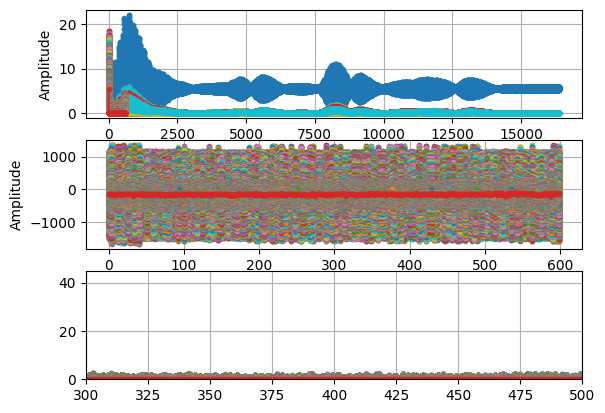

In [229]:
#plt(f,X_fftmag)
fig, [ax5,ax6,ax7] = plt.subplots(nrows=3, ncols=1)
ax5.plot(X_fftmage,'.-')
ax5.plot(X_fftmagb,'.-')
ax5.grid(True)
ax5.set_xlabel("Frequency (Hz)")
ax5.set_ylabel("Amplitude")
#ax5.set_xlim(300,500)
#ax5.set_ylim(0,45)


ax6.plot(baby,'.-')
ax6.grid(True)
ax6.set_xlabel("Samples")
ax6.set_ylabel("Amplitude")


ax7.plot(X_fftmagb,'.-')
ax7.set_xlim(300,500)
ax7.set_ylim(0,45)
ax7.grid(True)

plt.show()

(0.0, 43.0)

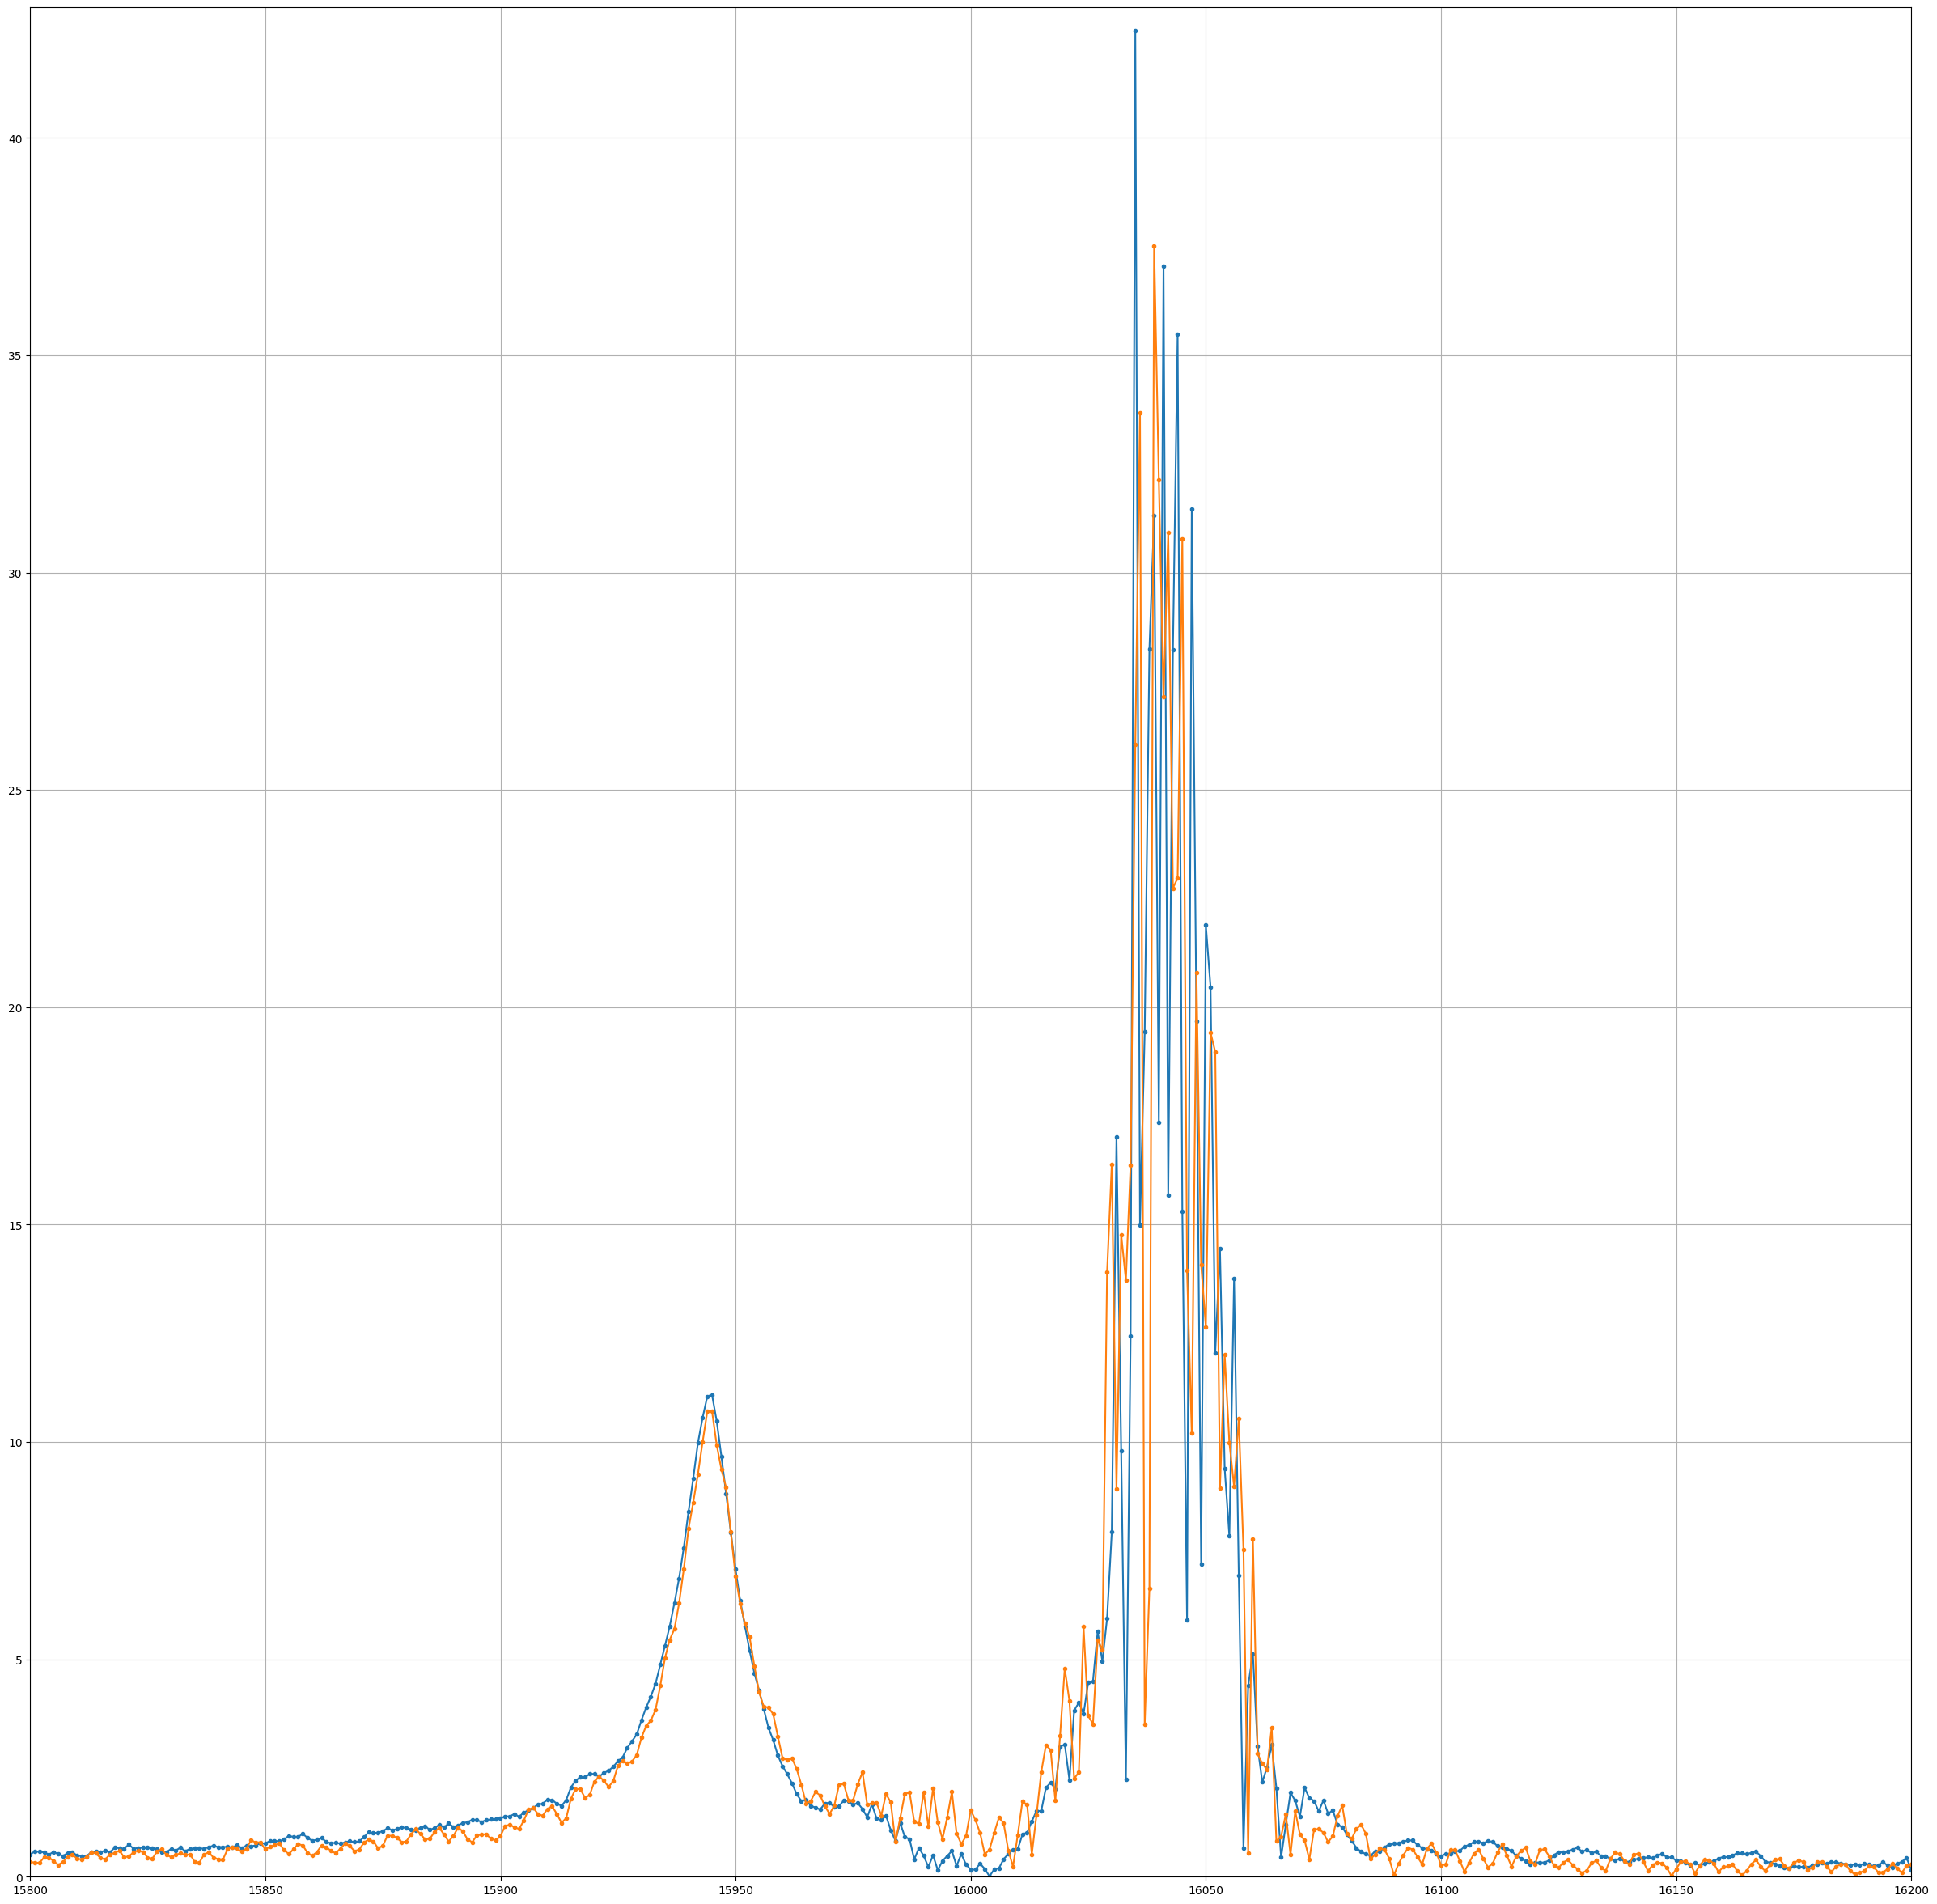

In [205]:
plt.figure(figsize=(30,30))
plt.plot(f,X_fftmage,'.-')
plt.plot(f,X_fftmagb,'.-')
plt.grid(True)
plt.xlim([15800,16200])
plt.ylim([0,43])


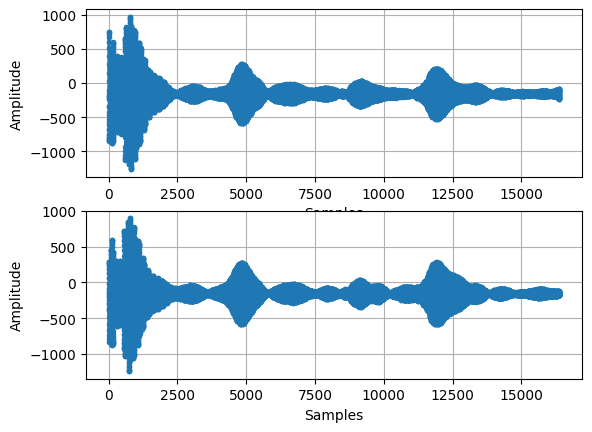

In [185]:
fig, [ax10,ax11] =  plt.subplots(nrows=2, ncols=1)
ax10.plot(f,emptynp,'.-')
ax10.grid(True)
ax10.set_xlabel("Samples")
ax10.set_ylabel("Amplitude")


ax11.plot(f,babynp,'.-')
ax11.grid(True)
ax11.set_xlabel("Samples")
ax11.set_ylabel("Amplitude")

plt.show()

In [168]:
emptyfft = X_fftmage.T
emptyfft = emptyfft.iloc[:,200:800]
emptyfft["Label"] = 0
emptyfft

,216,217,218,219,220,221,222,223,224,225,...,807,808,809,810,811,812,813,814,815,Label
0,0.301663,0.334276,0.332556,0.300508,0.315552,0.284857,0.270461,0.207141,0.227746,0.228092,...,0.253124,0.241002,0.203992,0.312183,0.269633,0.244664,0.229313,0.324569,0.299120,0
1,0.231681,0.366053,0.523309,0.315335,0.198804,0.401206,0.451845,0.196971,0.191806,0.344986,...,0.297347,0.191396,0.283653,0.286789,0.194466,0.306020,0.324070,0.316038,0.247314,0
2,0.440241,0.435416,0.343610,0.318547,0.456323,0.389439,0.233026,0.310124,0.398891,0.382524,...,0.216246,0.204501,0.326765,0.336066,0.266118,0.300955,0.394267,0.322832,0.251449,0
3,0.628720,0.583796,0.562806,0.529460,0.592474,0.616506,0.522625,0.478787,0.591013,0.537348,...,0.255711,0.246865,0.195275,0.213860,0.221488,0.194574,0.201593,0.217731,0.262181,0
4,0.287728,0.533751,0.353565,0.133434,0.449508,0.442742,0.139217,0.346492,0.469562,0.194456,...,0.284045,0.331377,0.327052,0.265820,0.316597,0.359284,0.250374,0.249470,0.377974,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.101713,0.093379,0.214142,0.172728,0.137757,0.254046,0.173838,0.155732,0.263699,0.256889,...,0.172210,0.134240,0.089428,0.067561,0.087339,0.109122,0.084524,0.096700,0.100955,0
496,0.322132,0.282787,0.257019,0.299830,0.234652,0.279850,0.286065,0.236846,0.293370,0.217551,...,0.203842,0.204053,0.220958,0.206732,0.251239,0.249295,0.285624,0.246778,0.295575,0
497,0.482930,0.170223,0.293716,0.077009,0.483601,0.409748,0.045486,0.223373,0.140891,0.454105,...,0.184856,0.135130,0.196588,0.143008,0.232044,0.206557,0.248612,0.285918,0.173875,0
498,0.231198,0.258530,0.317560,0.345163,0.256700,0.232718,0.244839,0.170120,0.136749,0.186516,...,0.245300,0.258409,0.187837,0.205016,0.220784,0.214943,0.163566,0.280513,0.302008,0


In [169]:
babyfft = X_fftmagb.T
babyfft = babyfft.iloc[:,200:800]
babyfft["Label"] = 1
babyfft

,216,217,218,219,220,221,222,223,224,225,...,807,808,809,810,811,812,813,814,815,Label
500,0.411762,0.514678,0.475772,0.464521,0.575236,0.589771,0.477332,0.405392,0.454056,0.541775,...,0.102632,0.109485,0.060404,0.151284,0.099979,0.100100,0.089907,0.053885,0.130544,1
501,0.285554,0.233444,0.109280,0.236355,0.337792,0.331297,0.213437,0.156491,0.345698,0.370575,...,0.237682,0.272415,0.281496,0.211049,0.154721,0.183607,0.192367,0.184132,0.169330,1
502,0.526290,0.515122,0.391947,0.498088,0.455166,0.393455,0.527027,0.457574,0.532307,0.566435,...,0.143839,0.132447,0.224751,0.090406,0.154841,0.225123,0.137576,0.169021,0.134168,1
503,0.178952,0.171664,0.265672,0.072643,0.201577,0.298460,0.170514,0.368377,0.180421,0.277260,...,0.290735,0.223369,0.317042,0.367880,0.316181,0.367509,0.280547,0.336526,0.222105,1
504,0.209251,0.208352,0.383787,0.409027,0.326441,0.425401,0.328210,0.386203,0.485286,0.426763,...,0.263332,0.166443,0.201415,0.139650,0.235774,0.129530,0.177418,0.165774,0.256083,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,0.211514,0.217953,0.225978,0.207071,0.260610,0.234390,0.311524,0.291222,0.286782,0.331842,...,0.178869,0.249090,0.232866,0.152666,0.213205,0.198187,0.091512,0.194517,0.117730,1
1896,0.459709,0.502356,0.386870,0.316648,0.430229,0.444481,0.398247,0.233892,0.316526,0.456709,...,0.213470,0.208510,0.303110,0.260439,0.191771,0.290850,0.301933,0.263135,0.261963,1
1897,0.885200,0.805308,0.693692,0.765286,0.920522,0.862328,0.783662,0.839403,0.926736,0.872444,...,0.320350,0.347674,0.388217,0.438053,0.385452,0.331637,0.404203,0.344118,0.346582,1
1898,0.306972,0.262895,0.231177,0.166233,0.185809,0.319044,0.340867,0.308508,0.327673,0.284943,...,0.211670,0.152031,0.163325,0.124138,0.103530,0.054714,0.103107,0.039595,0.112926,1


In [170]:
totalfft = pd.concat([emptyfft,babyfft])
totalfft

,216,217,218,219,220,221,222,223,224,225,...,807,808,809,810,811,812,813,814,815,Label
0,0.301663,0.334276,0.332556,0.300508,0.315552,0.284857,0.270461,0.207141,0.227746,0.228092,...,0.253124,0.241002,0.203992,0.312183,0.269633,0.244664,0.229313,0.324569,0.299120,0
1,0.231681,0.366053,0.523309,0.315335,0.198804,0.401206,0.451845,0.196971,0.191806,0.344986,...,0.297347,0.191396,0.283653,0.286789,0.194466,0.306020,0.324070,0.316038,0.247314,0
2,0.440241,0.435416,0.343610,0.318547,0.456323,0.389439,0.233026,0.310124,0.398891,0.382524,...,0.216246,0.204501,0.326765,0.336066,0.266118,0.300955,0.394267,0.322832,0.251449,0
3,0.628720,0.583796,0.562806,0.529460,0.592474,0.616506,0.522625,0.478787,0.591013,0.537348,...,0.255711,0.246865,0.195275,0.213860,0.221488,0.194574,0.201593,0.217731,0.262181,0
4,0.287728,0.533751,0.353565,0.133434,0.449508,0.442742,0.139217,0.346492,0.469562,0.194456,...,0.284045,0.331377,0.327052,0.265820,0.316597,0.359284,0.250374,0.249470,0.377974,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,0.211514,0.217953,0.225978,0.207071,0.260610,0.234390,0.311524,0.291222,0.286782,0.331842,...,0.178869,0.249090,0.232866,0.152666,0.213205,0.198187,0.091512,0.194517,0.117730,1
1896,0.459709,0.502356,0.386870,0.316648,0.430229,0.444481,0.398247,0.233892,0.316526,0.456709,...,0.213470,0.208510,0.303110,0.260439,0.191771,0.290850,0.301933,0.263135,0.261963,1
1897,0.885200,0.805308,0.693692,0.765286,0.920522,0.862328,0.783662,0.839403,0.926736,0.872444,...,0.320350,0.347674,0.388217,0.438053,0.385452,0.331637,0.404203,0.344118,0.346582,1
1898,0.306972,0.262895,0.231177,0.166233,0.185809,0.319044,0.340867,0.308508,0.327673,0.284943,...,0.211670,0.152031,0.163325,0.124138,0.103530,0.054714,0.103107,0.039595,0.112926,1


In [73]:
findmax = total.max(axis=1)
finalmax = findmax.max(axis=0)

In [14]:
total.iloc[:,0:16384]

,16,17,18,19,20,21,22,23,24,25,...,16390,16391,16392,16393,16394,16395,16396,16397,16398,16399
0,-155,-158,-159,-159,-330,-274,-219,-158,-96,-32,...,-141,-139,-144,-147,-151,-149,-148,-151,-153,-154
1,-163,-165,-162,-161,190,226,249,264,269,264,...,-158,-159,-158,-157,-162,-164,-168,-170,-167,-165
2,-152,-152,-158,-157,-158,-161,-158,-411,-361,-308,...,-132,-134,-137,-137,-140,-140,-143,-145,-145,-149
3,-163,-164,-166,-312,-251,-200,-141,-83,-14,58,...,-144,-144,-145,-146,-148,-148,-153,-159,-160,-163
4,-168,-170,-170,-161,-97,-30,38,103,159,204,...,-151,-155,-153,-156,-158,-156,-156,-158,-159,-162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-184,-184,-184,-187,-390,-346,-298,-249,-207,-150,...,-154,-154,-156,-165,-170,-183,-184,-185,-188,-190
1196,-189,-193,-192,-304,-252,-203,-147,-95,-34,27,...,-154,-161,-167,-170,-175,-181,-187,-195,-200,-199
1197,-205,-210,-208,-458,-448,-426,-391,-345,-293,-247,...,-164,-169,-173,-180,-178,-182,-186,-185,-183,-190
1198,-193,-193,-265,-211,-155,-99,-41,20,76,125,...,-111,-110,-114,-116,-123,-126,-127,-128,-130,-133


In [171]:
X_train = totalfft.iloc[:,0:600]
y_train = totalfft['Label']
X_train

,216,217,218,219,220,221,222,223,224,225,...,806,807,808,809,810,811,812,813,814,815
0,0.301663,0.334276,0.332556,0.300508,0.315552,0.284857,0.270461,0.207141,0.227746,0.228092,...,0.260520,0.253124,0.241002,0.203992,0.312183,0.269633,0.244664,0.229313,0.324569,0.299120
1,0.231681,0.366053,0.523309,0.315335,0.198804,0.401206,0.451845,0.196971,0.191806,0.344986,...,0.284146,0.297347,0.191396,0.283653,0.286789,0.194466,0.306020,0.324070,0.316038,0.247314
2,0.440241,0.435416,0.343610,0.318547,0.456323,0.389439,0.233026,0.310124,0.398891,0.382524,...,0.229435,0.216246,0.204501,0.326765,0.336066,0.266118,0.300955,0.394267,0.322832,0.251449
3,0.628720,0.583796,0.562806,0.529460,0.592474,0.616506,0.522625,0.478787,0.591013,0.537348,...,0.215139,0.255711,0.246865,0.195275,0.213860,0.221488,0.194574,0.201593,0.217731,0.262181
4,0.287728,0.533751,0.353565,0.133434,0.449508,0.442742,0.139217,0.346492,0.469562,0.194456,...,0.302161,0.284045,0.331377,0.327052,0.265820,0.316597,0.359284,0.250374,0.249470,0.377974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,0.211514,0.217953,0.225978,0.207071,0.260610,0.234390,0.311524,0.291222,0.286782,0.331842,...,0.165933,0.178869,0.249090,0.232866,0.152666,0.213205,0.198187,0.091512,0.194517,0.117730
1896,0.459709,0.502356,0.386870,0.316648,0.430229,0.444481,0.398247,0.233892,0.316526,0.456709,...,0.151629,0.213470,0.208510,0.303110,0.260439,0.191771,0.290850,0.301933,0.263135,0.261963
1897,0.885200,0.805308,0.693692,0.765286,0.920522,0.862328,0.783662,0.839403,0.926736,0.872444,...,0.300237,0.320350,0.347674,0.388217,0.438053,0.385452,0.331637,0.404203,0.344118,0.346582
1898,0.306972,0.262895,0.231177,0.166233,0.185809,0.319044,0.340867,0.308508,0.327673,0.284943,...,0.199614,0.211670,0.152031,0.163325,0.124138,0.103530,0.054714,0.103107,0.039595,0.112926


In [172]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
1895    1
1896    1
1897    1
1898    1
1899    1
Name: Label, Length: 1900, dtype: int64

In [173]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

regmod = ExtraTreesRegressor()
regmod.fit(X_train,y_train)

ExtraTreesRegressor()

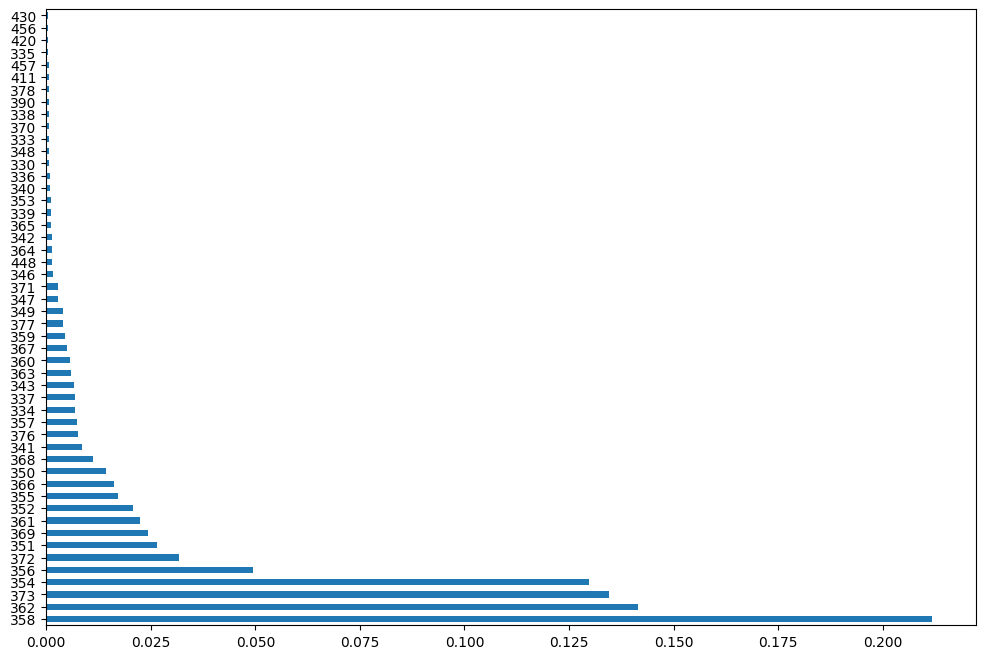

In [174]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(regmod.feature_importances_, index=X_train.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

In [ ]:
#Check number of peaks above 800

Ask for exact model of ultrasonic sensor , as for SRF02 has minimum range as 15 cm
ask about possibility of creating an ideal average signal and doing cross correlation of the signal to be detected with this ideal signal.
ask about changing angle of lower sensor, try taking measurements from upper sensor
confirm sampling rate and then analyse whether outliers pose a real risk in detection or not.

Calculate variance
Calculate difference from 1st peak to 2nd peak in amplitude and also frequency.
Repeat the same for difference between 2nd peak to 3rd peak and so on.

Check chance of cloth near head being detected as false baby